In [5]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [6]:
new_df = pd.read_csv('filename.csv')

In [7]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33032 entries, 0 to 33031
Data columns (total 12 columns):
Unnamed: 0     33032 non-null int64
ï..title       33032 non-null object
year           33032 non-null int64
director       33032 non-null int64
actor1         33032 non-null int64
actor2         33032 non-null int64
genre          33032 non-null int64
rating         33032 non-null float64
country        33032 non-null object
releasedate    29223 non-null object
rating2        33032 non-null int64
year2          33032 non-null int64
dtypes: float64(1), int64(8), object(3)
memory usage: 3.0+ MB


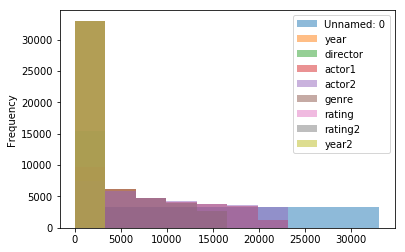

In [8]:
plt.figure();

new_df.plot.hist(alpha=0.5)

plt.show()

In [10]:
X = new_df[[ 'actor1', 'actor2', 'director','year2','rating2']]
y = new_df[['genre']]

X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33032 entries, 0 to 33031
Data columns (total 5 columns):
actor1      33032 non-null int64
actor2      33032 non-null int64
director    33032 non-null int64
year2       33032 non-null int64
rating2     33032 non-null int64
dtypes: int64(5)
memory usage: 1.3 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33032 entries, 0 to 33031
Data columns (total 1 columns):
genre    33032 non-null int64
dtypes: int64(1)
memory usage: 258.1 KB


In [14]:
from sklearn.preprocessing import OneHotEncoder
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=[ 'actor1', 'actor2', 'director']

In [ ]:
for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=X_train[[col]].append(X_test[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([X_train_1,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_1,temp],axis=1)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)


In [ ]:
from sklearn.linear_model import LinearRegression
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)


In [ ]:
regression_model.score(X_test, y_test)